# <span style="color:royalblue"> [4주차] 2024 부동산 수요와 공급</span> 
# 주택건설 준공실적 분석(feat. KB부동산 리브온)

--- 

<div style="text-align: right"> Final Edition : 2024.1.26<br>
    copyrightⓒ 2024 All rights reserved by Data Lover Pablo </div>

## 1. 주택 사용검사 실적(준공) 데이터 분석
[국토교통부 통계누리 link](http://stat.molit.go.kr/portal/cate/statView.do?hRsId=468&hFormId=5372&hSelectId=5372&hPoint=00&hAppr=1&hDivEng=&oFileName=&rFileName=&midpath=&month_yn=N&sFormId=5372&sStart=201007&sEnd=202111&sStyleNum=1&EXPORT=) <br>

### * 준공 데이터 수집
  - 정의 : ‘부동산 통계 선진화 방안’의 일환으로 주택 준공통계를 생산, 공표키로 의결<br>'10년 6월 국가통계위원회 지자체 및 LH 준공실적을 집계하여 주체별, 유형별, 지역별로 세분화된 통계 생산 
  - 소스 : 국토교통 통계누리 > 주택 > 승인통계 > 주택건설실적통계(준공) > 주택사용검사실적_월계
  - [URL](http://stat.molit.go.kr/portal/cate/statView.do?hRsId=468&hFormId=5372&hDivEng=&month_yn=)
  - 기간 : 2010년 7월 ~ 2023년 11월
  - 필터 : 행(row) : 월(Month) / 열(Column) : 시도별
  - 다운로드 : 마우스 오른쪽버튼 > 내리기 > [xlsx](https://stat.molit.go.kr/portal/cate/statView.do?hRsId=468&hFormId=5372&hSelectId=5372&hPoint=00&hAppr=1&hDivEng=&oFileName=&rFileName=&midpath=&month_yn=N&sFormId=5372&sStart=201007&sEnd=202206&sStyleNum=1&EXPORT=)
  

### * 추가 데이터 소개
  1) 인허가 [주택건설실적통계(인허가)](http://stat.molit.go.kr/portal/cate/statView.do?hRsId=31&hFormId=1946&hSelectId=626&hPoint=00&hAppr=1&hDivEng=&oFileName=&rFileName=&midpath=&month_yn=N&sFormId=1946&sStart=2020&sEnd=2020&sStyleNum=125&EXPORT=)
  [필터적용(행렬전환 예시)](https://stat.molit.go.kr/portal/cate/statView.do?hRsId=31&hFormId=1946&hSelectId=1946&hPoint=00&hAppr=1&hDivEng=&oFileName=&rFileName=&midpath=&month_yn=N&sFormId=1946&sStart=200701&sEnd=202206&sStyleNum=1&EXPORT=)<br>
  2) 착공 [주택건설실적통계(착공)](http://stat.molit.go.kr/portal/cate/statView.do?hRsId=471&hFormId=5388&hDivEng=&month_yn=)<br>
  3) 미분양 [미분양주택현황보고(공사완료후 미분양 현황)](http://stat.molit.go.kr/portal/cate/statView.do?hRsId=32&hFormId=5328&hDivEng=&month_yn=)
  

In [1]:
# !pip install openpyxl
# !pip install xlrd

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/주택건설실적통계(준공)_주택건설 준공실적(월계) (201007 ~ 202311).csv', encoding='cp949')
df

,월(Monthly),구 분,부문명,시도별,사용검사실적
0,2010-07,총계,총계,전국,24061
1,2010-07,총계,총계,서울,3513
2,2010-07,총계,총계,인천,968
3,2010-07,총계,총계,경기,6438
4,2010-07,총계,총계,부산,1903
...,...,...,...,...,...
57955,2023-11,민간,민간분양,전북,71
57956,2023-11,민간,민간분양,전남,901
57957,2023-11,민간,민간분양,경북,551
57958,2023-11,민간,민간분양,경남,206


In [4]:
import numpy as np

df = pd.pivot_table(df, values='사용검사실적', index=['월(Monthly)'], columns=['시도별'], aggfunc=np.sum)
# df.reset_index()

In [5]:
df

시도별,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전국,전남,전북,제주,충남,충북
월(Monthly),,,,,,,,,,,,,,,,,,
2010-07,3771,19314,10954,9852,240,4052,4146,5709,13555,0,1167,2904,83285,1431,1266,219,3688,1017
2010-08,2429,48708,1878,8019,7971,8468,8892,1134,12762,0,123,2874,122626,3567,4665,315,3525,7296
2010-09,3195,21021,5511,1527,246,3588,4914,1008,4374,474,0,2289,63630,3121,1122,393,6769,4078
2010-10,5451,41706,3108,8145,5787,288,11957,1365,5889,0,2721,16370,120262,1080,999,2498,3850,9048
2010-11,1149,22417,1926,5903,189,1851,843,2763,6183,0,9063,14813,87808,5360,4388,483,4197,6280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07,855,30709,5157,3617,1863,2733,270,3921,10348,81,1257,4281,97171,2571,3291,750,16905,8562
2023-08,5393,21317,5526,924,117,5856,186,798,5931,39,177,6180,68843,1494,1915,1421,8224,3345
2023-09,528,12627,510,534,285,21,127,510,5983,81,8198,1974,43272,1083,4306,987,3936,1582


In [6]:
# 데이터프레임 데이터 타입 파악하기

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 2010-07 to 2023-11
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   강원      161 non-null    int64
 1   경기      161 non-null    int64
 2   경남      161 non-null    int64
 3   경북      161 non-null    int64
 4   광주      161 non-null    int64
 5   대구      161 non-null    int64
 6   대전      161 non-null    int64
 7   부산      161 non-null    int64
 8   서울      161 non-null    int64
 9   세종      161 non-null    int64
 10  울산      161 non-null    int64
 11  인천      161 non-null    int64
 12  전국      161 non-null    int64
 13  전남      161 non-null    int64
 14  전북      161 non-null    int64
 15  제주      161 non-null    int64
 16  충남      161 non-null    int64
 17  충북      161 non-null    int64
dtypes: int64(18)
memory usage: 23.9+ KB


In [8]:
# 월 칼럼 데이터 타입을 문자 -> 날짜 타입으로 변경

In [9]:
from datetime import datetime, timedelta

df['월(Monthly)']= pd.to_datetime(df.index)
df['월(Monthly)']= pd.to_datetime(df['월(Monthly)'])

## [Pandas] 4. 필요한 열(Column) 추출하기
1. 칼럼 이름을 사용하는 방법
2. iloc를 이용하여 원하는 칼럼 추출하기<br>
   df.iloc[:,[0,2]]
3. drop을 이용하여 원하는 칼럼 추출하기<br>
   df.drop(['B','D'], axis=1)

In [10]:
# df1 = df[['월(Monthly)','총계']]
df1 = df[['월(Monthly)','전국']]
df1

시도별,월(Monthly),전국
월(Monthly),,
2010-07,2010-07-01,83285
2010-08,2010-08-01,122626
2010-09,2010-09-01,63630
2010-10,2010-10-01,120262
2010-11,2010-11-01,87808
...,...,...
2023-07,2023-07-01,97171
2023-08,2023-08-01,68843
2023-09,2023-09-01,43272


In [11]:
df1['월(Monthly)']

월(Monthly)
2010-07   2010-07-01
2010-08   2010-08-01
2010-09   2010-09-01
2010-10   2010-10-01
2010-11   2010-11-01
             ...    
2023-07   2023-07-01
2023-08   2023-08-01
2023-09   2023-09-01
2023-10   2023-10-01
2023-11   2023-11-01
Name: 월(Monthly), Length: 161, dtype: datetime64[ns]

In [12]:
df1 = df1.copy()
df1['연도'] = df1['월(Monthly)'].dt.year

In [13]:
df1['연도']

월(Monthly)
2010-07    2010
2010-08    2010
2010-09    2010
2010-10    2010
2010-11    2010
           ... 
2023-07    2023
2023-08    2023
2023-09    2023
2023-10    2023
2023-11    2023
Name: 연도, Length: 161, dtype: int32

In [14]:
## 연도를 끝 두자리만으로 파싱

In [15]:
df1['연도']= df1['월(Monthly)'].dt.strftime('%y')

In [16]:
df1

시도별,월(Monthly),전국,연도
월(Monthly),,,
2010-07,2010-07-01,83285,10
2010-08,2010-08-01,122626,10
2010-09,2010-09-01,63630,10
2010-10,2010-10-01,120262,10
2010-11,2010-11-01,87808,10
...,...,...,...
2023-07,2023-07-01,97171,23
2023-08,2023-08-01,68843,23
2023-09,2023-09-01,43272,23


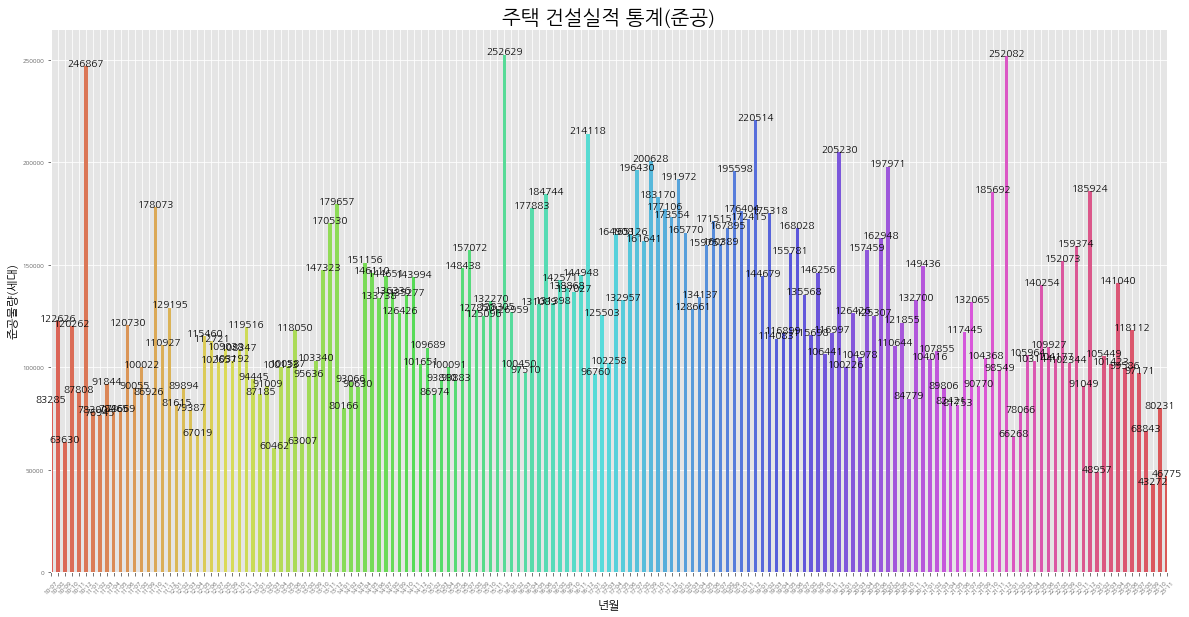

In [17]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib import style
import seaborn as sns
style.use('ggplot')
%matplotlib inline


# 기본설정
plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

## 데이터
x = df1['월(Monthly)'].dt.strftime('%y-%m')
y = df1['전국']

## 폰트 사이즈
tick_size = 6  ## 개별 눈금 폰트 사이즈
axis_label_size = 15  ## x축, y축 이름 폰트 사이즈

## 캔버스 크기 및 뼈대 설정
fig = plt.figure(figsize=(20, 10))  ## Figure 생성 사이즈는 10 by 10
ax = fig.add_subplot()  ## Axes 추가
plt.xlim(left=min(x), right=max(x))

## 색상 파레트 설정
colors = sns.color_palette('hls', len(x))  # hls 팔레트 이름

## x축과 y축 눈금표시
xtick_label_position = list(range(len(x)))  ## x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, x, fontsize=tick_size)
plt.yticks(fontsize=tick_size)

## 바 차트 출력
bars = plt.bar(xtick_label_position, y, color=colors,
               width=0.5)

## y라벨값 표시
for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2), b.get_height()+20, \
            y[i],ha='center',fontsize=10)

## 타이틀 출력
plt.title('주택 건설실적 통계(준공)', fontsize=20)  

## 축 라벨 출력
plt.xlabel('년월')  ## x축 라벨 출력
plt.ylabel('준공물량(세대)')  ## y축 라벨 출력

## x 축 라벨 회전
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)

plt.show()

## 2022 주택건설 준공물량(서울, 인천)
꺾은선 그래프

In [18]:
df_인천 = df[['월(Monthly)','서울', '인천']]
df_인천

시도별,월(Monthly),서울,인천
월(Monthly),,,
2010-07,2010-07-01,13555,2904
2010-08,2010-08-01,12762,2874
2010-09,2010-09-01,4374,2289
2010-10,2010-10-01,5889,16370
2010-11,2010-11-01,6183,14813
...,...,...,...
2023-07,2023-07-01,10348,4281
2023-08,2023-08-01,5931,6180
2023-09,2023-09-01,5983,1974


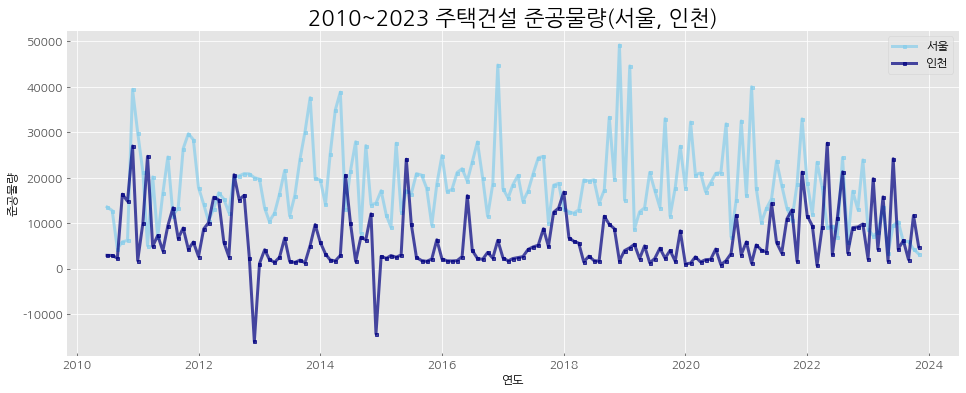

In [19]:
# 1. 기본 스타일 설정
plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

# 2. 데이터 준비
x = df['월(Monthly)'].to_numpy()
y1 = df['서울'].to_numpy()
y2 = df['인천'].to_numpy()

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

# y1 : 서울 준공물량에 대한 값
ax1.plot(x, y1, '-s', color='skyblue', markersize=3, linewidth=3, alpha=0.7, label='서울')
# ax1.set_ylim(0, 18)
ax1.set_xlabel('연도')
ax1.set_ylabel('준공물량')
ax1.tick_params(axis='both', direction='in')

# y2 : 인천 준공물량에 대한 값
ax2 = ax1
ax2.plot(x, y2, '-s', color='navy', markersize=3, linewidth=3, alpha=0.7, label='인천')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(True)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('2010~2023 주택건설 준공물량(서울, 인천)', fontsize=22)
plt.show()

In [20]:
# 인천 준공물량에 0보다 작은 값(이상치)를 제거해줍니다.
df = df[df['인천']>0]

## 주택건설 준공물량(서울, 인천) 막대그래프

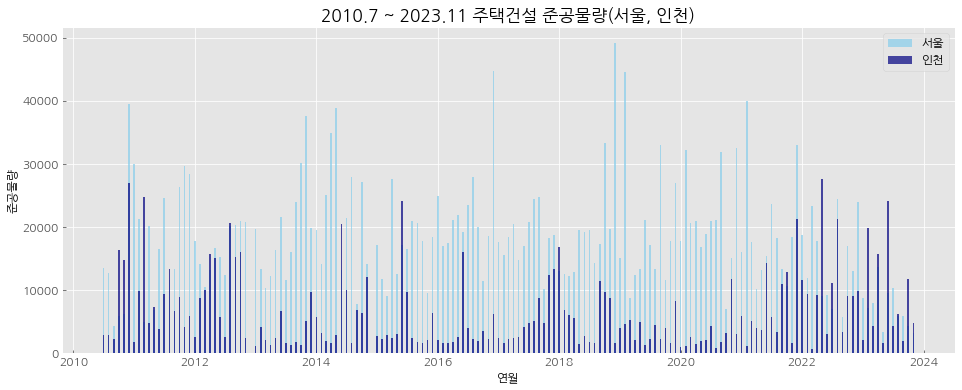

In [21]:
# 1. 기본 스타일 설정
plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = df['월(Monthly)']
y1 = df['서울']
y2 = df['인천']

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

# y1 : 서울 준공물량에 대한 값
ax1.bar(x, y1, color='skyblue', width=10, alpha=0.7, label='서울')
ax1.set_xlabel('연월')
ax1.set_ylabel('준공물량')
ax1.tick_params(axis='both', direction='in')

# y2 : 인천 준공물량에 대한 값
ax2 = ax1
ax2.bar(x, y2, color='navy', width=10, alpha=0.7, label='인천')
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(True)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('2010.7 ~ 2023.11 주택건설 준공물량(서울, 인천)')
plt.show()

# 2. 매매가, 전세가, 인허가, 미분양 한번에 시각화

## xlwings 패키지

  - 엑셀에 날개를 달아준다는 패키지입니다.
  - 엑셀에서 파이썬 매크로를 사용할 때 활용합니다. 반대의 경우도 가능 파이썬에서 Visial Basic 매크로 사용
  - padas read_excel() 함수로는 열리지 않는 엑셀파일은 xlwings의 경우에는 설치된 excel을 이용해서 오픈가능
  - 엑셀파일을 파이썬 객체로 생성(객체 호출시, 엑셀파일도 자동으로 실행됨)

![서울](./data/xlwing.jpg)

[xlwings Github](https://github.com/xlwings/xlwings/blob/main/docs/installation.rst)

In [22]:
# !pip install xlwings

In [23]:
import xlwings as xw

### xlwings의 4가지 계층구조
1. App
2. Book
3. Sheet
4. Range

 - 엑셀 인스턴스 생성
app = xw.App(visible=False) # 엑셀 프로그램을 열지않고 파이썬에서만 인스턴스(객체)를 불러오는 visible=False라는 옵션
 - Book 목록
wb = app.Book('파일명.xlsx')
 - 첫번째 시트 읽어오기
sheet = wb.sheets[0]
 - 데이터프레임 형태로 엑셀 시트 읽어오기
df = sheet.range('A1').options(pd.DataFrame, index=False, expand='table').value
 - 인스턴스 종료
app.kill()

![xlwings](./data/appbook.png)

### xlwings 주요 기능

  df = xw.book('파일명.xlsx')
  
  - 객체 이름속성 문자열 반환
    df.name
    
  - 시트 갯수 반환
    df.sheets.count :
    
  - 시트명 문자열 반환
    df_sh1 = df.sheet(1)  
    df_sh1 = df.sheet('Sheet1')
  
  - 셀 값 출력(리스트로 반환)
    a = df_sh1['A1:A4'].value  
    print(a)
  
  - 딕셔너리 형태로 반환
  dtn = df_sh1['A1:A4'].options(dict).value  
  
  - 판다스 시리즈 형태로 반환
  sr = df_sh1[['A1:A4'].options(pd.Series).value  
  
  - 판다스 데이터프레임 형태로 반환
   df = df_sh1[['A1:A4'].options(pd.DataFrame).value

#### expand 기능

options 메서드의 expand 매개변수
매일 변동하는 표의 범위를 자동으로 인식.

expand의 인수로는 ‘down’, ‘right’, ‘table’
설정된 Range 객체의 범위를 아래쪽(‘down’) 또는 오른쪽(‘right’), 혹은 양쪽 모두(‘table’)로 확장 기능

df1 = sh1['A1:E7'].options(pd.DataFrame).value<br><br>

<span style="color:royalblue">
df2 = sh1['A1:E1'].options(pd.DataFrame, expand='down')<br>
Ctrl + Shift + 방향키 ↓를 눌러서 선택 범위를 확장한 다음 확장된 범위 내의 자료값을 데이터프레임으로 불러온다는 의미</span>

df3 = sh1['A1:A7'].options(pd.DataFrame, expand='right')<br>
Ctrl + Shift + 방향키 →를 연속으로 누른 경우

df4 = sh1['A1'].options(pd.DataFrame, expand='table')  : 표 영역 전체로 확장<br>
Ctrl + Shift + 방향키 ↓ 과 방향키 →를 연속으로 누른 경우

## 2.1 인허가 엑셀 데이터를 read_excel로 읽어오기

[인허가 데이터](https://stat.molit.go.kr/portal/cate/statView.do?hRsId=31&hFormId=1946&hSelectId=1946&hPoint=00&hAppr=1&hDivEng=&oFileName=&rFileName=&midpath=&month_yn=N&sFormId=1946&sStart=200701&sEnd=202208&sStyleNum=1&EXPORT=)

In [24]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [25]:
path = r'./data/주택건설실적통계(인허가)_부문별 주택건설 인허가실적(월별 누계) (200701 ~ 202311).xlsx'
tr_per = pd.read_excel(path, index_col=0)

In [26]:
# !pip install --user openpyxl==3.0.7

In [27]:
tr_per.head(12)

,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전국,전남,전북,제주,충남,충북,합계 : 인허가실적
2007-01,1356,8579,5073,2094,3066,2454,165,1365,4590,0,549,207,36754,620,2664,396,3012,564,73508
2007-02,1928,18207,12618,10122,6600,10647,267,4662,6972,0,4068,555,92323,2102,4470,696,6930,1479,184646
2007-03,3095,27899,19581,17064,10641,13788,462,11025,12636,0,6123,3345,152565,3275,6459,1011,12600,3561,305130
2007-04,6621,39860,22728,20736,11319,15330,705,12117,18525,0,12966,13356,210187,6932,7881,1455,14703,4953,420374
2007-05,8160,79364,41118,23286,18396,17055,2238,14808,24123,0,13698,13989,308706,7991,11834,1689,23964,6993,617412
2007-06,14955,105921,47616,27786,18813,20600,3519,15513,29802,0,19059,31066,415562,17405,12803,3710,30348,16646,831124
2007-07,14955,105921,47616,27786,18813,20600,3519,15513,29802,0,19059,31066,555960,17405,12803,3710,30348,16646,971522
2007-08,14955,105921,47616,27786,18813,20600,3519,15513,29802,0,19059,31066,710001,17405,12803,3710,30348,16646,1125563
2007-09,14955,105921,47616,27786,18813,20600,3519,15513,29802,0,19059,31066,906368,17405,12803,3710,30348,16646,1321930
2007-10,14955,105921,47616,27786,18813,20600,3519,15513,29802,0,19059,31066,1275111,17405,12803,3710,30348,16646,1690673


In [28]:
tr_per.index

Index(['2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06',
       '2007-07', '2007-08', '2007-09', '2007-10',
       ...
       '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08',
       '2023-09', '2023-10', '2023-11', '합계'],
      dtype='object', length=204)

In [29]:
tr_per = tr_per.drop(['합계'], axis=0)

## 2.1 인허가 데이터를 가져오는 함수 정의

In [88]:

def per_preprocessing(path):
    
    df = pd.read_excel(path, index_col=0)
    df = df.drop(['합계'], axis=0)
    df = df.drop(['합계 : 인허가실적'], axis=1)
    
    return df

In [89]:
path = r'./data/주택건설실적통계(인허가)_부문별 주택건설 인허가실적(월별 누계) (200701 ~ 202311).xlsx'
per_preprocessing(path)

,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전국,전남,전북,제주,충남,충북
2007-01,1356,8579,5073,2094,3066,2454,165,1365,4590,0,549,207,36754,620,2664,396,3012,564
2007-02,1928,18207,12618,10122,6600,10647,267,4662,6972,0,4068,555,92323,2102,4470,696,6930,1479
2007-03,3095,27899,19581,17064,10641,13788,462,11025,12636,0,6123,3345,152565,3275,6459,1011,12600,3561
2007-04,6621,39860,22728,20736,11319,15330,705,12117,18525,0,12966,13356,210187,6932,7881,1455,14703,4953
2007-05,8160,79364,41118,23286,18396,17055,2238,14808,24123,0,13698,13989,308706,7991,11834,1689,23964,6993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07,27928,152613,29610,46026,15804,25170,34201,43269,58308,903,21268,38014,639534,38439,26193,13392,51698,16698
2023-08,28858,157713,30255,47709,15870,25320,34282,44193,60810,969,21343,38398,655971,39519,26694,14091,52568,17379
2023-09,35725,206949,35031,53508,27357,25365,36925,51516,62070,990,28147,49570,786781,42474,28128,17697,58802,26527
2023-10,39982,216546,35628,56640,28809,25425,38782,56781,68095,1008,28643,52135,840966,49914,29367,20538,64001,28672


# 2.2 미분양 데이터 가져오는 함수 정의

  [미분양주택현황보고(공사완료후 미분양 현황)](https://stat.molit.go.kr/portal/cate/statView.do?hRsId=32&hFormId=2080&hSelectId=2080&hPoint=00&hAppr=1&hDivEng=&oFileName=&rFileName=&midpath=&month_yn=N&sFormId=2080&sStart=200701&sEnd=202206&sStyleNum=1&sDivEng=N&EXPORT=)

In [32]:
unsold_path = r'./data/미분양주택현황보고_규모별 미분양현황 (200701 ~ 202311).xlsx'
unsold_raw = pd.read_excel(unsold_path, index_col=0)

In [33]:
unsold_raw

,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,수도권,울산,인천,전국,전남,전북,제주,충남,충북,합계 : 호
2007-01,15936,10812,35316,18630,21015,28401,2457,26040,2091,0,13632,3540,729,226848,16122,15537,231,22347,7644,467328
2007-02,16032,10083,34689,17844,18738,27402,2409,25959,1770,0,12789,3630,936,220857,15759,15294,288,22089,7935,454503
2007-03,17403,7737,33984,17562,17715,27567,3144,25644,2061,0,10596,5061,798,219486,14661,15552,564,22338,7695,449568
2007-04,16380,7464,36447,16257,17487,27027,3060,24222,2055,0,10176,4563,657,220179,13992,14436,486,24750,10896,450534
2007-05,15636,7464,35169,18909,23526,32664,2871,23892,2112,0,10662,4500,1086,235713,13920,13875,468,27585,12036,482088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08,11184,16203,13779,24597,1719,32337,3531,6981,2928,381,23028,9207,3897,185433,10773,10536,7266,18702,11412,393894
2023-09,11874,14913,13128,23040,1719,31503,2754,6705,2742,381,23016,8970,5361,179418,10800,10098,7236,17442,10752,381852
2023-10,11583,14178,12564,22128,1704,31128,2397,6831,2724,378,21981,9333,5079,174897,10755,9681,7569,15972,10893,371775
2023-11,11583,14469,12204,20577,1812,30984,2241,7602,2631,375,20994,9207,3894,173775,11322,9393,7530,17421,10530,368544


In [34]:
unsold_raw.index

Index(['2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06',
       '2007-07', '2007-08', '2007-09', '2007-10',
       ...
       '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08',
       '2023-09', '2023-10', '2023-11', '합계'],
      dtype='object', length=204)

In [35]:
# 미분양 데이터프레임 전처리
unsold_raw = unsold_raw.drop(['합계'], axis=0)
unsold_raw = unsold_raw.drop(['합계 : 호'], axis=1)

In [36]:
unsold_raw.head(12)

,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,수도권,울산,인천,전국,전남,전북,제주,충남,충북
2007-01,15936,10812,35316,18630,21015,28401,2457,26040,2091,0,13632,3540,729,226848,16122,15537,231,22347,7644
2007-02,16032,10083,34689,17844,18738,27402,2409,25959,1770,0,12789,3630,936,220857,15759,15294,288,22089,7935
2007-03,17403,7737,33984,17562,17715,27567,3144,25644,2061,0,10596,5061,798,219486,14661,15552,564,22338,7695
2007-04,16380,7464,36447,16257,17487,27027,3060,24222,2055,0,10176,4563,657,220179,13992,14436,486,24750,10896
2007-05,15636,7464,35169,18909,23526,32664,2871,23892,2112,0,10662,4500,1086,235713,13920,13875,468,27585,12036
2007-06,19926,11697,36216,22995,24816,37467,3537,27636,2334,0,16680,4584,2649,269772,15504,13986,456,33735,12234
2007-07,20550,11649,37242,25623,21558,36537,3573,28671,2520,0,16560,5223,2391,271974,15123,15867,537,32121,12789
2007-08,19875,13356,37728,25167,22299,36225,4434,29775,2190,0,17451,4692,1905,275142,15450,15606,516,32790,13134
2007-09,19674,23718,38433,26049,21882,35832,6285,32217,2172,0,27411,9720,1521,294705,16596,14709,507,32889,12501
2007-10,20019,25719,38082,26028,22800,35637,6264,36036,2931,0,29640,10770,990,302661,16923,13608,402,33996,12456


In [37]:
# 미분양 데이터를 데이터프레임으로 변환하는 함수 정의 

def unsold_preprocessing(path):
    
    tr_unsold = pd.read_excel(unsold_path, index_col=0)
    tr_unsold = tr_unsold.drop(['합계'], axis=0)
    tr_unsold = tr_unsold.drop(['합계 : 호'], axis=1)

    return tr_unsold

In [38]:
unsold_path = r'./data/미분양주택현황보고_규모별 미분양현황 (200701 ~ 202311).xlsx'
unsold_preprocessing(path)

,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,수도권,울산,인천,전국,전남,전북,제주,충남,충북
2007-01,15936,10812,35316,18630,21015,28401,2457,26040,2091,0,13632,3540,729,226848,16122,15537,231,22347,7644
2007-02,16032,10083,34689,17844,18738,27402,2409,25959,1770,0,12789,3630,936,220857,15759,15294,288,22089,7935
2007-03,17403,7737,33984,17562,17715,27567,3144,25644,2061,0,10596,5061,798,219486,14661,15552,564,22338,7695
2007-04,16380,7464,36447,16257,17487,27027,3060,24222,2055,0,10176,4563,657,220179,13992,14436,486,24750,10896
2007-05,15636,7464,35169,18909,23526,32664,2871,23892,2112,0,10662,4500,1086,235713,13920,13875,468,27585,12036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07,9972,19623,11784,23502,2094,33540,4374,6774,3243,231,26502,8727,3636,189261,10551,11301,7074,21198,11637
2023-08,11184,16203,13779,24597,1719,32337,3531,6981,2928,381,23028,9207,3897,185433,10773,10536,7266,18702,11412
2023-09,11874,14913,13128,23040,1719,31503,2754,6705,2742,381,23016,8970,5361,179418,10800,10098,7236,17442,10752
2023-10,11583,14178,12564,22128,1704,31128,2397,6831,2724,378,21981,9333,5079,174897,10755,9681,7569,15972,10893


## 2.3 KB 부동산 데이터를 가져오는 함수 정의

![kb](./data/kb.jpg)

[kb부동산 리브온](https://kbland.kr/)

In [45]:
import pandas as pd
import xlwings as xw

In [46]:
path = r'./data/202312_월간시계열.xlsx'
sheet_name='2.매매APT'

app = xw.App(visible=False) # 1. App
wb = app.books.open(path)    # 2. book
sheet = wb.sheets[sheet_name] # 3. Sheet  

In [47]:
sheet.range(1,1).end('down').end('down').end('down').row

465

In [48]:
def KB_preprocessing(path, sheet_name):
    # path : KB 데이터 엑셀 파일의 저장경로
    # sheet_name : ‘매매종합’, ‘2.매매APT’, ‘매매연립’, ‘매매단독’, ‘전세종합’, ‘6.전세APT’, ‘전세연립’, ‘전세단독’ 중 하나
    
    app = xw.App(visible=False) # 1. App
    wb = app.books.open(path)    # 2. book
    sheet = wb.sheets[sheet_name] # 3. Sheet  
    
    row_num = sheet.range(1,1).end('down').end('down').end('down').row  # 4. Range 459번째 행
    data_range = 'A2:GE' + str(row_num-5) # A2:GE451`
    
    df = sheet[data_range].options(pd.DataFrame, index=False, header=True).value #시트의 범위에 해당하는 데이터 를 데이터 프레임저장
    
    #23개 만 아래 순으로 하드코딩
    statesname_list = ['서울특별시', '대구광역시', '부산광역시', '대전광역시', '광주광역시', '인천광역시', '울산광역시', '세종특별시', '경기도', '강원특별자치도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도','구분', '전국']
    
    states_col = list(df.columns) # 칼럼명 # 187개 값.(None 포함) 전국, 서울, 강북, 강남 등...
    small_col = list(df.iloc[0]) # 칼럼명 아래 인덱스값 187개 값(None 포함) (0, 강북구), (1, 광진구)..., 노원구 등

    for num, district_data in enumerate(small_col):
        if district_data == None: # 아래 인덱스 값이 없으면 위의 인덱스값 준용. 예를 들어 서울 전체는 아래 small_col 값이 None 이므로
            small_col[num] = states_col[num] # None 값에 "서울"을 입력

        check = num # 확인 필요칼럼 수
        while True:
            if states_col[check] in statesname_list: # 위 23개 하드코딩 리스트에 포함되면
                states_col[num] = states_col[check] # 위의 인덱스 값으로 입력 small_col 값 입력
                break
            else:
                check = check - 1 
                
# 칼럼 값 안맞는 부분 하드코딩                
    small_col[3] = '강북' #경기도 광주. 광주>경기
    states_col[129] = '경기' #경기도 광주. 광주>경기
    small_col[-3] = '' #'제주/\n서귀포'
    
    df.columns = [states_col, small_col] #  ('서울',  '강북구') 와 같은 Multi index로 묶어줌.
    new_col_data = df.drop([0,1]) # 첫번째, 두번째 줄(행) 의미없는 데이터 삭제
    
    index_list = list(new_col_data['구분']['구분'])

    new_index = []

# 날짜 부분을 datetime 데이터 타입으로 변경    
    for num, raw_index in enumerate(index_list):# [86, 1]
        temp = str(raw_index).split('.')
        if int(temp[0]) > 12 : # 월만 써있는 값 (12) 보다 큰 연도값
            if len(temp[0]) == 2: # 두자리 연도 
                new_index.append('19' + temp[0] + '.' + temp[1]) #1986.1
            else: # 4자리 연도
                new_index.append(temp[0] + '.' + temp[1])
        else:# (분할된 첫 숫자가 12보다 작은) 월만 있는 값
            new_index.append(new_index[num-1].split('.')[0] + '.' + temp[0])

    new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
    cleaned_data  = new_col_data.drop(('구분', '구분'), axis=1)
    return cleaned_data

# 3. 데이터 전처리
앞서 정의한 함수를 이용해 데이터를 불러와서 전처리 하기

In [122]:
# 인허가 물량 데이터
path = r'./data/주택건설실적통계(인허가)_부문별 주택건설 인허가실적(월별 누계) (200701 ~ 202311).xlsx'
per = per_preprocessing(path)

# 미분양 물량 데이터
unsold_path = r'./data/미분양주택현황보고_규모별 미분양현황 (200701 ~ 202311).xlsx'
unsold = unsold_preprocessing(unsold_path)

# 매매가와 전세가 데이터
path = r'./data/202312_월간시계열.xlsx'
price_index = KB_preprocessing(path, '2.매매APT') 
jun_index = KB_preprocessing(path, '6.전세APT')

In [52]:
price_index

전국      서울특별시                                              \
                   전국      서울특별시         강북        강북구        광진구        노원구   
1986-01-01  15.910037  12.634687  17.654568       None       None       None   
1986-02-01  15.910037  12.656584  17.625626       None       None       None   
1986-03-01  15.880737  12.634687  17.596684       None       None       None   
1986-04-01  15.792836  12.547098  17.480916       None       None       None   
1986-05-01  15.675635  12.481406  17.249381       None       None       None   
...               ...        ...        ...        ...        ...        ...   
2023-08-01  90.011772  90.338585  88.503273  88.694978  93.415584  84.870662   
2023-09-01  90.088355  90.577885  88.564576  88.749225  93.600613  84.740392   
2023-10-01  90.171682  90.786965  88.646116  88.903279  93.959341  84.733587   
2023-11-01  90.177104  90.821491  88.599421   88.92639  94.118278  84.429406   
2023-12-01  90.080022  90.725487  88.469239  88.656086  94.128591  84.198454   

                                                        ...       경상남도  \
                  도봉구       동대문구        마포구       서대문구  ...        의창구   
1986-01-01       None       None       None       None  ...       None   
1986-02-01       None       None       None       None  ...       None   
1986-03-01       None       None       None       None  ...       None   
1986-04-01       None       None       None       None  ...       None   
1986-05-01       None       None       None       None  ...       None   
...               ...        ...        ...        ...  ...        ...   
2023-08-01  83.820584   87.18984    92.4772   88.22126  ...  95.327992   
2023-09-01  83.663751  87.292883  92.903408  88.331496  ...    95.2732   
2023-10-01  83.619899  87.490738  93.130133  88.513018  ...  95.562286   
2023-11-01  83.374611  87.392763  93.192953  88.857047  ...  96.123496   
2023-12-01  82.965241  87.165582  93.182801  89.056212  ...  96.068768   

                                                                     \
                   진해구         양산         거제         진주시        김해시   
1986-01-01        None       None       None        None       None   
1986-02-01        None       None       None        None       None   
1986-03-01        None       None       None        None       None   
1986-04-01        None       None       None        None       None   
1986-05-01        None       None       None        None       None   
...                ...        ...        ...         ...        ...   
2023-08-01  100.230934   95.99924  92.379759    99.84977  92.449175   
2023-09-01  100.010617  95.757151  92.157878  100.149896  92.234408   
2023-10-01    99.80501  95.685886  91.991377  100.522123  92.018765   
2023-11-01   99.587745  95.430645  91.895691  100.684919  91.853314   
2023-12-01   99.495978   95.10813  91.131709  100.874384  91.707797   

                                제주특별자치도             
                   통영시          제주특별자치도       기타지방  
1986-01-01        None  None       None       None  
1986-02-01        None  None       None       None  
1986-03-01        None  None       None       None  
1986-04-01        None  None       None       None  
1986-05-01        None  None       None       None  
...                ...   ...        ...        ...  
2023-08-01  100.153165  None   99.15744  96.489872  
2023-09-01  100.125139  None  99.119475  96.476374  
2023-10-01   100.09349  None  99.147254  96.505826  
2023-11-01   100.00747  None  98.951861  96.501643  
2023-12-01   99.952562  None   98.78602  96.413047  

[456 rows x 186 columns]

# 4. 특정 지역의 인허가와 매매가 지수 그래프 그리기
구 이름 등은 아래 district_list에서 확인하시어 넣어주시면 됩니다.

In [53]:
price_index.columns

MultiIndex([(     '전국',      '전국'),
            (  '서울특별시',   '서울특별시'),
            (  '서울특별시',      '강북'),
            (  '서울특별시',     '강북구'),
            (  '서울특별시',     '광진구'),
            (  '서울특별시',     '노원구'),
            (  '서울특별시',     '도봉구'),
            (  '서울특별시',    '동대문구'),
            (  '서울특별시',     '마포구'),
            (  '서울특별시',    '서대문구'),
            ...
            (   '경상남도',     '의창구'),
            (   '경상남도',     '진해구'),
            (   '경상남도',      '양산'),
            (   '경상남도',      '거제'),
            (   '경상남도',     '진주시'),
            (   '경상남도',     '김해시'),
            (   '경상남도',     '통영시'),
            (   '경상남도',        ''),
            ('제주특별자치도', '제주특별자치도'),
            ('제주특별자치도',    '기타지방')],
           length=186)

In [54]:
price_index['xaxis'] = price_index.index
price_index['xaxis']

1986-01-01   1986-01-01
1986-02-01   1986-02-01
1986-03-01   1986-03-01
1986-04-01   1986-04-01
1986-05-01   1986-05-01
                ...    
2023-08-01   2023-08-01
2023-09-01   2023-09-01
2023-10-01   2023-10-01
2023-11-01   2023-11-01
2023-12-01   2023-12-01
Name: xaxis, Length: 456, dtype: datetime64[ns]

In [58]:
y1.shape

(156,)

In [60]:
x.shape

(156,)

In [62]:
y2

array([181932, 208333, 278800,  13284,  33213,  52356,  70805,  88745,
       109278, 140529, 163587, 183407, 204007, 230713, 264423,  11427,
        20867,  33830,  49964,  68760,  90373, 122211, 151615, 169109,
       186048, 202950, 250621,  12777,  23560,  36337,  54874,  78270,
       108840, 121965, 129738, 146993, 166679, 191394, 201869,  11926,
        25549,  49459,  66529,  80326, 110274, 157387, 182803, 219378,
       254372, 272291, 311175,  16758,  34380,  47296,  79765,  94381,
       109661, 141121, 159760, 170034, 184516, 199366, 231501,  15306,
        54517,  76032,  98916, 114258, 132309, 158406, 180525, 232645,
       282681, 308718, 360791,  17082,  27594,  40677,  56788,  74032,
        84917, 103832, 116942, 128076, 145644, 171173, 200471,  24227,
        40148,  88257,  98586, 108717, 116415, 127749, 140742, 148727,
       157780, 172001, 193370,  10311,  27278,  42291,  55971,  68343,
        79320,  92595, 101853, 117549, 138771, 153471, 183041,   8239,
      

In [67]:
per['서울']['2011-01':'2023-11']

2011-01    14721
2011-02    30113
2011-03    45407
2011-04    77267
2011-05    99176
           ...  
2023-07    58308
2023-08    60810
2023-09    62070
2023-10    68095
2023-11    71054
Name: 서울, Length: 155, dtype: int64

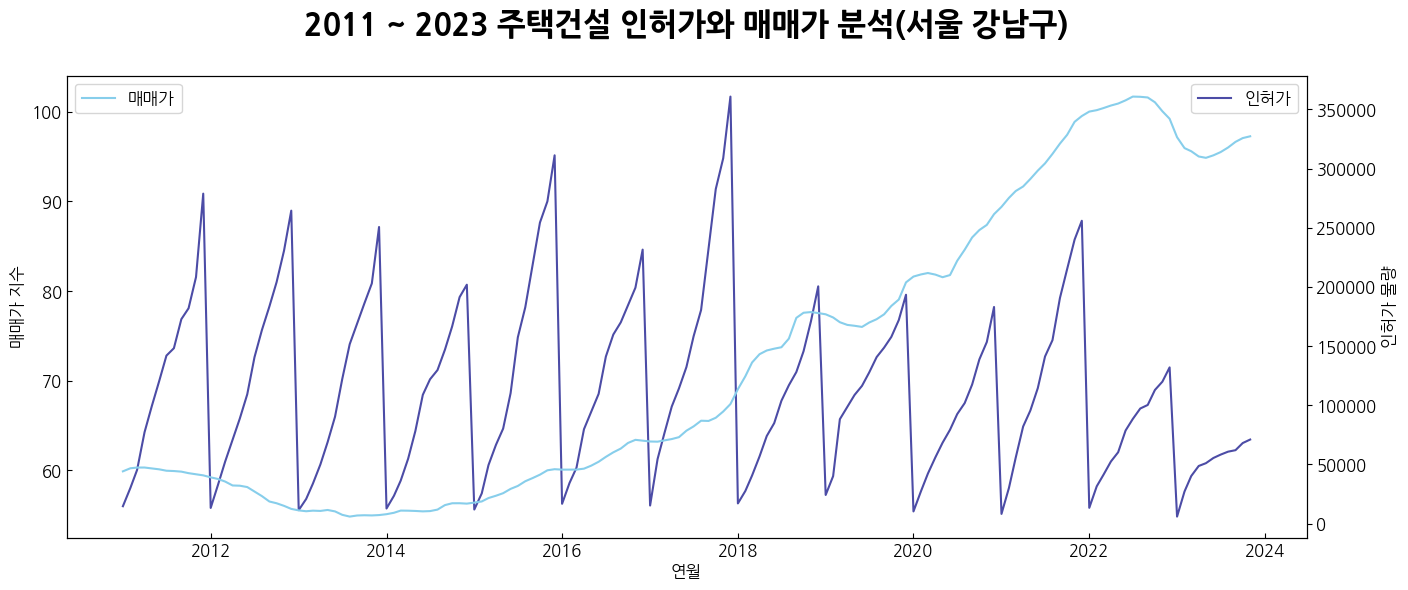

In [76]:
import matplotlib.pyplot as plt
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['font.size'] = 12
plt.rc('font', family='NanumGothic')

# 원하는 지역 입력
city = '서울특별시'
district = '강남구'

# 2. 데이터 준비
x = price_index['xaxis']['2011-01':'2023-11'].to_numpy() # 매매가 x축
y1 = price_index[city][district]['2011-01':'2023-11'].to_numpy() # 매매가 y1축
y2 = per['서울']['2011-01':'2023-11'].to_numpy() # 인허가 y2축

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

# y1 : 매매가 plot 그래프 (서울시 강남구)
ax1.plot(x, y1, color='skyblue', label='매매가')

ax1.set_xlabel('연월')
ax1.set_ylabel('매매가 지수')
ax1.tick_params(axis='both', direction='in')


# y2 : 서울 인허가 bar 그래프
ax2 = ax1.twinx() # x축 공유, y축 별도 설정.
ax2.plot(x, y2, color='navy', alpha=0.7, label='인허가') #, width=10
ax2.set_ylabel('인허가 물량')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('2011 ~ 2023 주택건설 인허가와 매매가 분석(서울 강남구)', fontsize = 22, pad= 30, fontweight=1000)
plt.show()

# 5. 인허가 데이터 시프팅
앞서 설명드린데로 인허가에서 준공(입주)까지는 2~3년 시간이 소요됩니다.<br>
이에 따라 인허가 데이터를 3년 뒤로 밀어보겠습니다.

In [ ]:
# 행과 열의 생략을 없애는 옵션 설명
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# 월별 누계 데이터에서 연도별 인허가 물량을 산출하는 데이터 전처리 우리는 연도별 인허가 데이터를 받아왔으므로 생략합니다.
# df = pd.read_csv('./data/지역별_주택건설_인허가실적_20230709202547.csv', encoding='cp949')

월별 누계 데이터에서 데이터를 만들어봅니다.

In [102]:
path = r'./data/주택건설실적통계(인허가)_부문별 주택건설 인허가실적(월별 누계) (200701 ~ 202311).xlsx'
df = per_preprocessing(path)

In [103]:
df

,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전국,전남,전북,제주,충남,충북
2007-01,1356,8579,5073,2094,3066,2454,165,1365,4590,0,549,207,36754,620,2664,396,3012,564
2007-02,1928,18207,12618,10122,6600,10647,267,4662,6972,0,4068,555,92323,2102,4470,696,6930,1479
2007-03,3095,27899,19581,17064,10641,13788,462,11025,12636,0,6123,3345,152565,3275,6459,1011,12600,3561
2007-04,6621,39860,22728,20736,11319,15330,705,12117,18525,0,12966,13356,210187,6932,7881,1455,14703,4953
2007-05,8160,79364,41118,23286,18396,17055,2238,14808,24123,0,13698,13989,308706,7991,11834,1689,23964,6993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07,27928,152613,29610,46026,15804,25170,34201,43269,58308,903,21268,38014,639534,38439,26193,13392,51698,16698
2023-08,28858,157713,30255,47709,15870,25320,34282,44193,60810,969,21343,38398,655971,39519,26694,14091,52568,17379
2023-09,35725,206949,35031,53508,27357,25365,36925,51516,62070,990,28147,49570,786781,42474,28128,17697,58802,26527
2023-10,39982,216546,35628,56640,28809,25425,38782,56781,68095,1008,28643,52135,840966,49914,29367,20538,64001,28672


In [106]:
year_per = df_new.groupby(df_new.index.year).sum()

---

In [107]:
shifted_per = year_per.shift(3)
shifted_per

temp = []

# 매년 12월 31일로 변경하여 temp 변수에 넣어줍니다.
for year in shifted_per.index:
    temp.append(str(year) + '-01') 

# # 시계열 데이터 형태로 바꿔줍니다.
shifted_per.index = pd.to_datetime(temp)

In [108]:
price_index[city][district]['2011-01':]

2011-01-01    59.892683
2011-02-01     60.23401
2011-03-01     60.31496
2011-04-01    60.318209
2011-05-01    60.217432
                ...    
2023-08-01    95.993766
2023-09-01    96.624532
2023-10-01    97.045327
2023-11-01    97.245942
2023-12-01    97.260064
Name: 강남구, Length: 156, dtype: object

In [109]:
shifted_per['서울']['2011-01':]

2011-01-01     48417.0
2012-01-01     36090.0
2013-01-01     69190.0
2014-01-01     88060.0
2015-01-01     86123.0
2016-01-01     77621.0
2017-01-01     65249.0
2018-01-01    101235.0
2019-01-01     74739.0
2020-01-01    113131.0
2021-01-01     65751.0
2022-01-01     62272.0
2023-01-01     58181.0
Name: 서울, dtype: float64

# 6. 특정 지역에 대한 인허가와 매매가 그래프 그리기

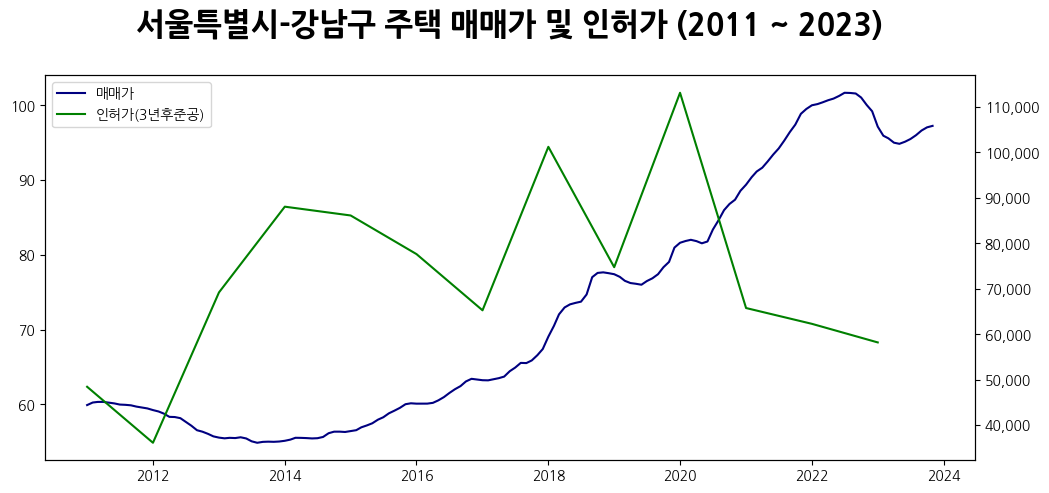

In [127]:
plt.style.use('default')
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False 

# 그래프 크기, 구도 및 축 설정
plt.figure(figsize=(12,5))
ax = plt.subplot()
ax2 = ax.twinx()

# 여러분들 사시는 곳을 입력합니다.
city = '서울특별시'
district = '강남구'

# 그래프 타이틀 입니다.
plt.title(city + '-' + district + ' 주택 매매가 및 인허가 (2011 ~ 2023)', fontsize = 22, pad= 30, fontweight=1000)

# 10년간 매매가와 인허가를 각각 꺾은선 그래프로 표현
line_1 = ax.plot(price_index[city][district]['2011-01':'2023-11'], label='매매가',color='navy') #,marker="^")
line_2 = ax2.plot(shifted_per['서울']['2011-01':'2023-11'], label='인허가(3년후준공)', color='green') #,marker="d")

lines = line_1 +line_2

# 천단위 콤마(,) 찍어주기
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# 라벨과 범례
labs = [l.get_label() for l in lines]
ax.legend(lines, labs, loc='upper left')

plt.show()

# 배경색 변경
# ax.set_facecolor('gray')

# 지수(Scientific notation) 표현식을 일반식으로 변환 
# ax2.get_yaxis().get_major_formatter().set_scientific(False) 

# 7. 최근 10년간 해당지역의 부동산 수요와 공급 지표 확인

In [113]:
price_index[city][district]

1986-01-01         None
1986-02-01         None
1986-03-01         None
1986-04-01         None
1986-05-01         None
                ...    
2023-08-01    95.993766
2023-09-01    96.624532
2023-10-01    97.045327
2023-11-01    97.245942
2023-12-01    97.260064
Name: 강남구, Length: 456, dtype: object

In [124]:
temp = []

# 매년 12월 31일로 변경하여 temp 변수에 넣어줍니다.
for year in unsold.index:
    temp.append(str(year) + '-01') 

# # 시계열 데이터 형태로 바꿔줍니다.
unsold.index = pd.to_datetime(temp)

In [125]:
unsold['서울']

2007-01-01    2091
2007-02-01    1770
2007-03-01    2061
2007-04-01    2055
2007-05-01    2112
              ... 
2023-07-01    3243
2023-08-01    2928
2023-09-01    2742
2023-10-01    2724
2023-11-01    2631
Name: 서울, Length: 203, dtype: int64

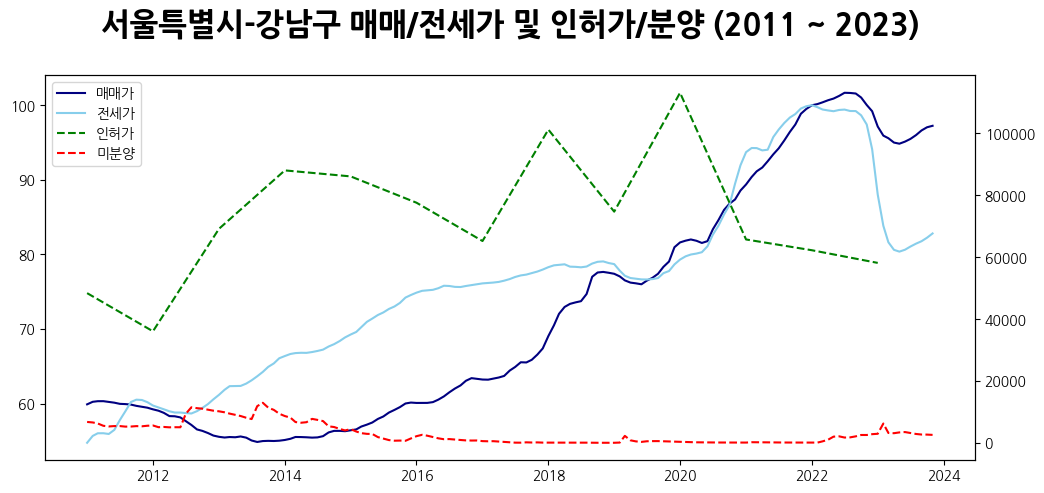

In [128]:
plt.style.use('default')
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False 

# 그래프 크기, 구도 및 축 설정
plt.figure(figsize=(12,5))
ax = plt.subplot()
ax2 = ax.twinx()

# 이번에는 서울 강남구를 나타내 보겠습니다.
city = '서울특별시'
district = '강남구'

plt.title(city + '-' + district + ' 매매/전세가 및 인허가/분양 (2011 ~ 2023)', fontsize = 22, pad= 30, fontweight=1000)

line_1 = ax.plot(price_index[city][district]['2011-01':'2023-11'], label='매매가',color='navy')
line_2 = ax.plot(jun_index[city][district]['2011-01':'2023-11'], label='전세가', color='skyblue')
line_3 = ax2.plot(shifted_per['서울']['2011-01':'2023-11'], label='인허가', color='green', ls='--') # 단위환산(만호>천호) /10 삭제
line_4 = ax2.plot(unsold['서울']['2011-01':'2023-11'], label='미분양', color='red', ls='--')
lines = line_1 +line_2 + line_3 + line_4

labs = [l.get_label() for l in lines]
ax.legend(lines, labs, loc='upper left')
    
plt.show()